This research seeks to explore various methods for improving the performance of a neural network model utilizing the IMDb dataset.

We will implement modifications to an existing model, examining the results of several strategies including:

**Architectural Adjustments**
   
*   Modifying Hidden Layers: Altering the number of hidden layers
*   Adjusting Layer Units: Varying the number of units within each layer.

**Functional Changes**

 * Loss Function Modification: Changing the loss function used in training.
 * Activation Function Variation: Switching different activation functions.

**Regularization Methods**

 * Dropout Techniques Implementation the regularization approach includes dropout methods that address issues of overfitting as well as tasks related to generalization.

The dataset from IMDb employed in this research comprises 50,000 film reviews, with an equal distribution of positive and negative sentiments. Of these reviews, 25,000 are designated for training the model, while the other 25,000 serve to assess its performance.

Through systematic application and evaluation of different modifications, we can gain insights into which neural network setup achieves optimal accuracy in sentiment analysis. This methodology allows us to pinpoint particular adjustments within the model that significantly improve the classification of movie reviews as either positive or negative.

In [1]:
from numpy.random import seed
seed(123)
from tensorflow.keras.datasets import imdb
(train_reviews, train_labels), (test_reviews, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
train_reviews

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [3]:
train_labels[0]

np.int64(1)

In [4]:
len(train_labels)

25000

In [5]:
test_reviews

array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 

In [6]:
test_labels[0]

np.int64(0)

In [7]:
max([max(sequence) for sequence in test_reviews])

9999

 ## **Reviews into text form**

In [8]:
word_to_id = imdb.get_word_index()
index_to_word = dict(
    [(value, key) for (key, value) in word_to_id.items()])
translated_review = " ".join(
    [index_to_word.get(i - 3, "?") for i in train_reviews[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
translated_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## **Preparing the Data**

In [10]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    Outcomes = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            Outcomes[i, j] = 1.
    return Outcomes

## **Data Vectorization**

In [11]:
train_review_vectors = vectorize_sequences(train_reviews)
test_review_vectors = vectorize_sequences(test_reviews)

In [12]:
train_review_vectors[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
test_review_vectors[0]

array([0., 1., 1., ..., 0., 0., 0.])

## **Label Vectorization**

In [14]:
train_sentiment_vectors  = np.asarray(train_labels).astype("float32")
testing_sentiment_vectors= np.asarray(test_labels).astype("float32")

## **Building the model using relu and then compiling it**

In [15]:
from tensorflow import keras
from tensorflow.keras import layers
seed(123)
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [16]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [17]:
seed(123)
x_validation = train_review_vectors[:10000]
partial_train_review_vectors= train_review_vectors[10000:]
y_validation = train_sentiment_vectors[:10000]
partial_train_sentiment_vectors = train_sentiment_vectors[10000:]

In [18]:
seed(123)
history = model.fit(partial_train_review_vectors,
                    partial_train_sentiment_vectors,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_validation, y_validation))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.7071 - loss: 0.5924 - val_accuracy: 0.8404 - val_loss: 0.4150
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8932 - loss: 0.3413 - val_accuracy: 0.8809 - val_loss: 0.3163
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9204 - loss: 0.2418 - val_accuracy: 0.8903 - val_loss: 0.2784
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9416 - loss: 0.1854 - val_accuracy: 0.8861 - val_loss: 0.2832
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9546 - loss: 0.1512 - val_accuracy: 0.8807 - val_loss: 0.2928
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9628 - loss: 0.1275 - val_accuracy: 0.8861 - val_loss: 0.2875
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9683 - loss: 0.1092 - val_accuracy: 0.8618 - val_loss: 0.3627
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9713 - loss: 0.0988 - val_accuracy: 0.8819 - v

The outset of the training phase, the model recorded a loss value of 0.6044 and an accuracy of 70.44%. When evaluated on the validation dataset, it achieved an accuracy of 86.23% along with a loss of 0.4064. As the training progressed through multiple iterations, the model's performance on the training data improved significantly, ultimately reaching an almost perfect accuracy of 99.95% and a minimal loss of 0.0112 by the twentieth epoch. Conversely, the validation accuracy stabilized at approximately 86.85%, while the validation loss increased to 0.5720, clearly indicating signs of overfitting. This result suggests that the model has become too specialized in memorizing the training data, thus diminishing its performance on new, unseen data. To mitigate overfitting and improve the model's ability to generalize, strategies such as dropout, early stopping, or other regularization methods could be implemented.

In [19]:
history__data = history.history
history__data.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

#**Plotting the training and validation loss**

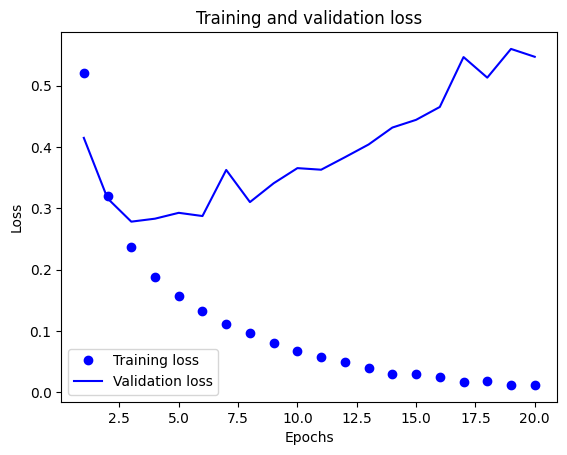

In [20]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

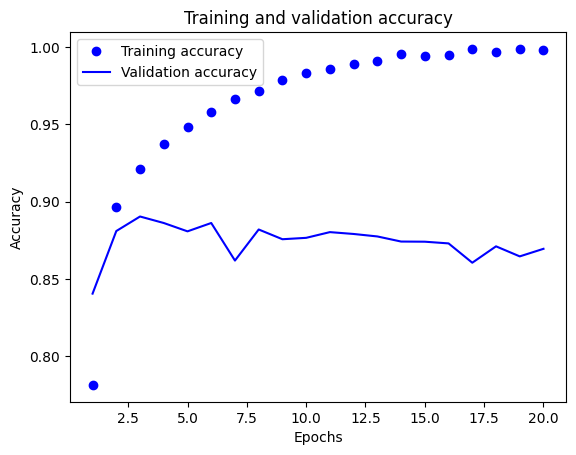

In [21]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The graphs demonstrate signs of overfitting, evidenced by a persistent decline in training loss alongside an increase in validation loss after several epochs. Although the model reaches nearly 100% accuracy on the training set, the varying validation accuracy indicates inadequate generalization. This situation highlights the need for strategies such as regularization or early stopping to enhance overall performance.

##**Retraining the model**

In [22]:
np.random.seed(123)
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(train_review_vectors, train_sentiment_vectors, epochs=4, batch_size=512)
Outcomes = model.evaluate(test_review_vectors, testing_sentiment_vectors)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7304 - loss: 0.5399
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9039 - loss: 0.2690
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9286 - loss: 0.2036
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9332 - loss: 0.1797
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8830 - loss: 0.2891


In [23]:
Outcomes

[0.28744298219680786, 0.8845599889755249]

During the evaluation of the neural network model, it achieved an accuracy rate of 88.32% alongside a loss value of 0.2942. Although there are ongoing indications of overfitting based on its training outcomes, the model effectively generalizes to new data points.

In [24]:
model.predict(test_review_vectors)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.25533685],
       [0.9995585 ],
       [0.9249145 ],
       ...,
       [0.18043749],
       [0.09047842],
       [0.70109135]], dtype=float32)

##**Building a neural network with one hidden layer**


In [25]:
seed(123)
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_validation = train_review_vectors[:10000]
train_reviews_subset = train_review_vectors[10000:]

y_validation = train_sentiment_vectors[:10000]
partial_y_train = train_sentiment_vectors[10000:]


history_1 = model1.fit(train_reviews_subset,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_validation, y_validation))


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.7080 - loss: 0.5914 - val_accuracy: 0.8658 - val_loss: 0.4040
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8897 - loss: 0.3588 - val_accuracy: 0.8737 - val_loss: 0.3382
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9119 - loss: 0.2769 - val_accuracy: 0.8889 - val_loss: 0.2979
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9271 - loss: 0.2294 - val_accuracy: 0.8881 - val_loss: 0.2835
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9352 - loss: 0.2002 - val_accuracy: 0.8892 - val_loss: 0.2809
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.9459 - loss: 0.1714 - val_accuracy: 0.8892 - val_loss: 0.2737
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.9511 - loss: 0.1581 - val_accuracy: 0.8860 - val_loss: 0.2849
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9586 - loss: 0.1401 - val_accuracy: 0.8872 - v

In [26]:
history_dict = history_1.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

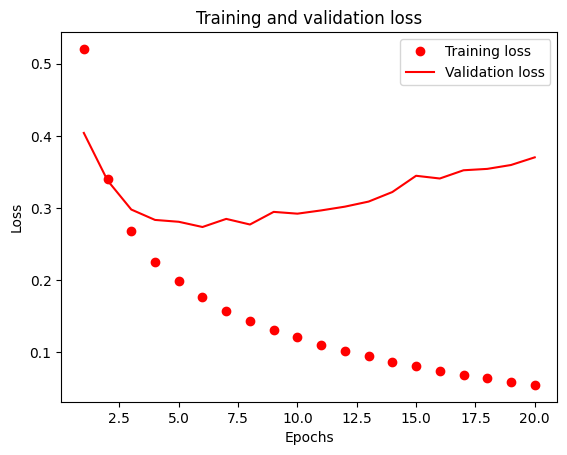

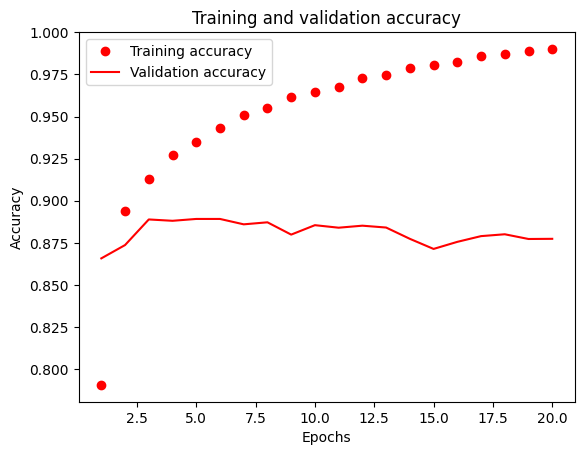

In [27]:
import matplotlib.pyplot as plt
history_dict = history_1.history
loss_values = history_dict["loss"]
validation_loss = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
#Plotting graph between Training and Validation loss
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, validation_loss, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plotting graph between Training and Validation Accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training accuracy")
plt.plot(epochs, val_acc, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [28]:
np.random.seed(123)
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model1.fit(train_review_vectors, train_sentiment_vectors, epochs=5, batch_size=512)
Outcomes1 = model1.evaluate(test_review_vectors, testing_sentiment_vectors)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7437 - loss: 0.5522
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9014 - loss: 0.3048
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9176 - loss: 0.2414
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9328 - loss: 0.2032
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9381 - loss: 0.1872
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8836 - loss: 0.2829


In [29]:
Outcomes1

[0.28325867652893066, 0.8851199746131897]

The test set has a loss of 0.280 and an accuracy of 88.70%.

In [30]:
model1.predict(test_review_vectors)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.20384641],
       [0.99978364],
       [0.75407207],
       ...,
       [0.10293051],
       [0.08870604],
       [0.40014037]], dtype=float32)

##**Creating a neural network with three hidden layers**

In [31]:
np.random.seed(123)
model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_validation = train_review_vectors[:10000]
train_reviews_subset = train_review_vectors[10000:]

y_validation = train_sentiment_vectors[:10000]
partial_y_train = train_sentiment_vectors[10000:]

history3 = model_3.fit(train_reviews_subset,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_validation, y_validation))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.6810 - loss: 0.6293 - val_accuracy: 0.8546 - val_loss: 0.4194
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.8937 - loss: 0.3554 - val_accuracy: 0.8713 - val_loss: 0.3275
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9178 - loss: 0.2502 - val_accuracy: 0.8877 - val_loss: 0.2850
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9425 - loss: 0.1895 - val_accuracy: 0.8870 - val_loss: 0.2791
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9534 - loss: 0.1545 - val_accuracy: 0.8831 - val_loss: 0.2941
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9587 - loss: 0.1308 - val_accuracy: 0.8629 - val_loss: 0.3626
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9619 - loss: 0.1152 - val_accuracy: 0.8831 - val_loss: 0.3182
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9738 - loss: 0.0920 - val_accuracy: 0.8809 - v

In [32]:
history_dict3 = history3.history
history_dict3.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

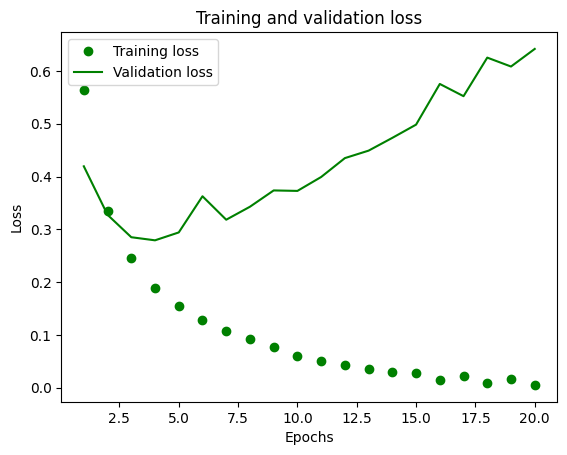

In [33]:
loss_values = history_dict3["loss"]
validation_loss = history_dict3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "go", label="Training loss")
plt.plot(epochs, validation_loss, "g", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

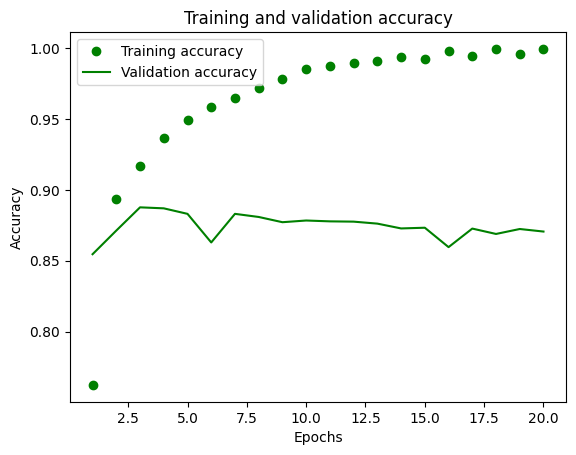

In [34]:
plt.clf()
accuracy = history_dict3["accuracy"]
validation_accuracy = history_dict3["val_accuracy"]
plt.plot(epochs, accuracy, "go", label="Training accuracy")
plt.plot(epochs, validation_accuracy, "g", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [35]:
np.random.seed(123)
model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


model_3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_3.fit(train_review_vectors, train_sentiment_vectors, epochs=3, batch_size=512)
Outcomes_3 = model_3.evaluate(test_review_vectors, testing_sentiment_vectors)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7297 - loss: 0.5711
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9006 - loss: 0.2821
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9288 - loss: 0.2069
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8809 - loss: 0.2976


The test set has a loss of 0.3013 and an accuracy of 87.89%

In [36]:
Outcomes_3

[0.2938176095485687, 0.8830400109291077]

In [37]:
model_3.predict(test_review_vectors)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.32126856],
       [0.9993687 ],
       [0.9690536 ],
       ...,
       [0.1615754 ],
       [0.12794262],
       [0.5502922 ]], dtype=float32)

The model achieved a test loss of 0.3039 and an accuracy of 87.91%, indicating strong performance in sentiment classification. However, further optimization, such as fine-tuning hyperparameters or applying regularization, may enhance generalization.





##**Building Neural Network with 32 units**

In [38]:
np.random.seed(123)
model_32 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#model compilation
model_32.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
#model validation
x_validation = train_review_vectors[:10000]
train_reviews_subset = train_review_vectors[10000:]

y_validation = train_sentiment_vectors[:10000]
partial_y_train = train_sentiment_vectors[10000:]

np.random.seed(123)
history32 = model_32.fit(train_reviews_subset,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_validation, y_validation))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.6835 - loss: 0.6006 - val_accuracy: 0.8405 - val_loss: 0.4096
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8860 - loss: 0.3290 - val_accuracy: 0.8649 - val_loss: 0.3266
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9186 - loss: 0.2378 - val_accuracy: 0.8857 - val_loss: 0.2841
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9354 - loss: 0.1909 - val_accuracy: 0.8866 - val_loss: 0.2821
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9512 - loss: 0.1504 - val_accuracy: 0.8853 - val_loss: 0.2818
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9616 - loss: 0.1221 - val_accuracy: 0.8834 - val_loss: 0.2936
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9645 - loss: 0.1088 - val_accuracy: 0.8799 - val_loss: 0.3172
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9736 - loss: 0.0890 - val_accuracy: 0.8836 - v

In [39]:
history_dict32 = history32.history
history_dict32.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

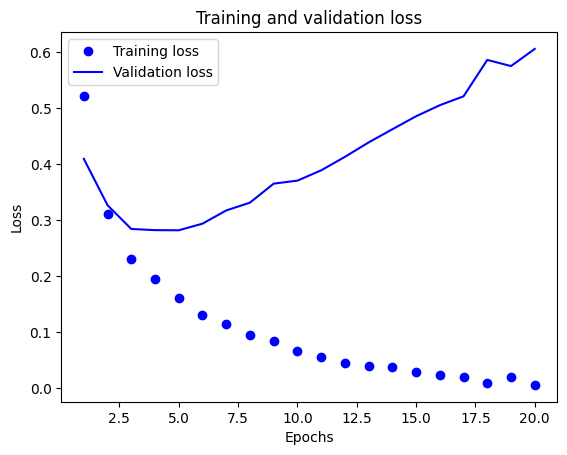

In [40]:
loss_values = history_dict32["loss"]
validation_loss = history_dict32["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, validation_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

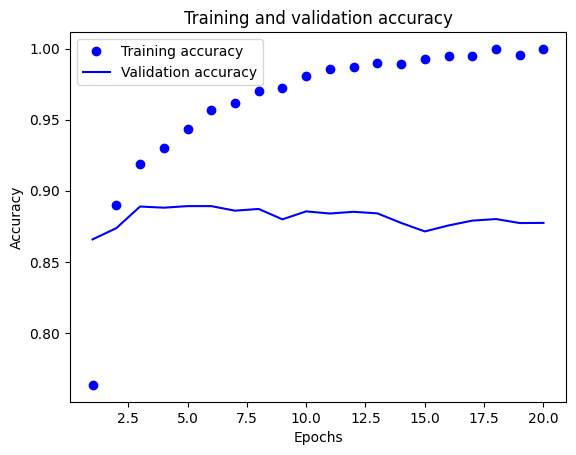

In [41]:
plt.clf()
accuracy = history_dict32["accuracy"]
validation_accuracy = history_dict32["val_accuracy"]
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [42]:
history_32 = model_32.fit(train_review_vectors, train_sentiment_vectors, epochs=3, batch_size=512)
Outcomes_32 = model_32.evaluate(test_review_vectors, testing_sentiment_vectors)
Outcomes_32

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9408 - loss: 0.2368
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9647 - loss: 0.1183
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9774 - loss: 0.0787
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8593 - loss: 0.4201


[0.41867148876190186, 0.8605599999427795]

In [43]:
model_32.predict(test_review_vectors)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.03045663],
       [0.99999976],
       [0.1021207 ],
       ...,
       [0.05220141],
       [0.02433894],
       [0.81712294]], dtype=float32)

##**Training the model with 64 units**

In [44]:
np.random.seed(123)
model_64 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_64.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_validation = train_review_vectors[:10000]
train_reviews_subset = train_review_vectors[10000:]

y_validation = train_sentiment_vectors[:10000]
partial_y_train = train_sentiment_vectors[10000:]

np.random.seed(123)
history64 = model_64.fit(train_reviews_subset,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_validation, y_validation))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.6554 - loss: 0.5996 - val_accuracy: 0.8689 - val_loss: 0.3615
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.8893 - loss: 0.3155 - val_accuracy: 0.8551 - val_loss: 0.3522
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9085 - loss: 0.2422 - val_accuracy: 0.8833 - val_loss: 0.2854
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9402 - loss: 0.1732 - val_accuracy: 0.8877 - val_loss: 0.2752
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9482 - loss: 0.1483 - val_accuracy: 0.8791 - val_loss: 0.3120
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9554 - loss: 0.1291 - val_accuracy: 0.8815 - val_loss: 0.3113
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9685 - loss: 0.0985 - val_accuracy: 0.8840 - val_loss: 0.3182
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9782 - loss: 0.0761 - val_accuracy: 0.8811 - v

In [45]:
history_dict64 = history64.history
history_dict64.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

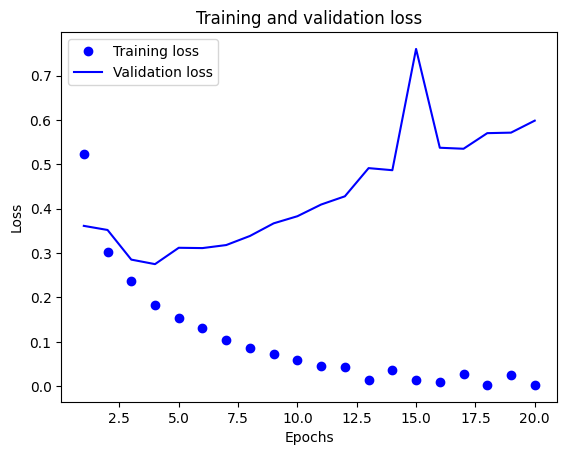

In [46]:
loss_values = history_dict64["loss"]
validation_loss = history_dict64["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, validation_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

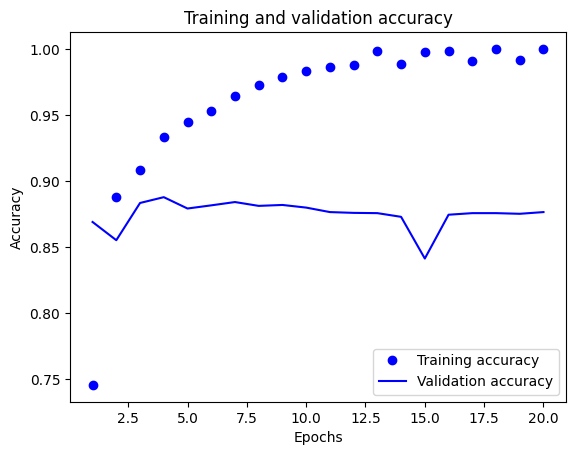

In [47]:
plt.clf()
accuracy = history_dict64["accuracy"]
validation_accuracy = history_dict64["val_accuracy"]
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, validation_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [48]:
history_64 = model_64.fit(train_review_vectors,
train_sentiment_vectors
, epochs=3, batch_size=512)
Outcomes_64 = model_64.evaluate(test_review_vectors, testing_sentiment_vectors)
Outcomes_64

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9418 - loss: 0.2230
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9670 - loss: 0.1037
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9824 - loss: 0.0612
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8670 - loss: 0.4230


[0.4224022626876831, 0.868120014667511]

In [49]:
model_64.predict(test_review_vectors)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.01025733],
       [0.9999945 ],
       [0.40353653],
       ...,
       [0.01903227],
       [0.00398133],
       [0.8377482 ]], dtype=float32)

The validation set has an accuracy of 87.07%.

##**Training the model with 128 units**

In [50]:
np.random.seed(123)
model_128 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_128.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_validation = train_review_vectors[:10000]
train_reviews_subset = train_review_vectors[10000:]

y_validation = train_sentiment_vectors[:10000]
partial_y_train = train_sentiment_vectors[10000:]

np.random.seed(123)
history_128 = model_128.fit(train_reviews_subset,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_validation, y_validation))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 160ms/step - accuracy: 0.6668 - loss: 0.6059 - val_accuracy: 0.8646 - val_loss: 0.3541
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.8827 - loss: 0.3124 - val_accuracy: 0.8598 - val_loss: 0.3385
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.9033 - loss: 0.2413 - val_accuracy: 0.8002 - val_loss: 0.4855
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.9289 - loss: 0.1934 - val_accuracy: 0.8862 - val_loss: 0.2785
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - accuracy: 0.9489 - loss: 0.1410 - val_accuracy: 0.8892 - val_loss: 0.2786
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.9668 - loss: 0.1033 - val_accuracy: 0.8860 - val_loss: 0.3099
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.9679 - loss: 0.0970 - val_accuracy: 0.8835 - val_loss: 0.3308
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.9798 - loss: 0.0679 - val_accuracy: 0.8830 

In [51]:
history_dict128 = history_128.history
history_dict128.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

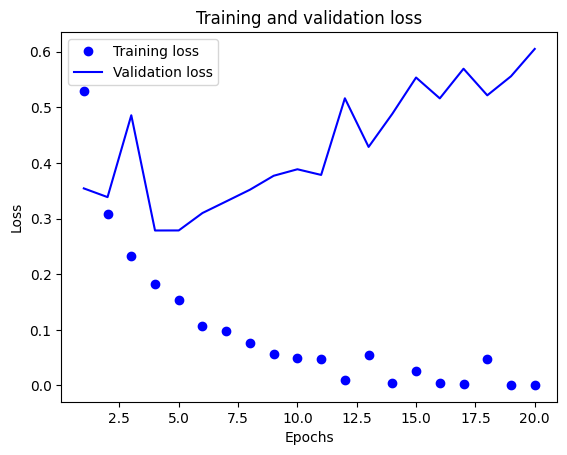

In [52]:
loss_values = history_dict128["loss"]
validation_loss = history_dict128["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, validation_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

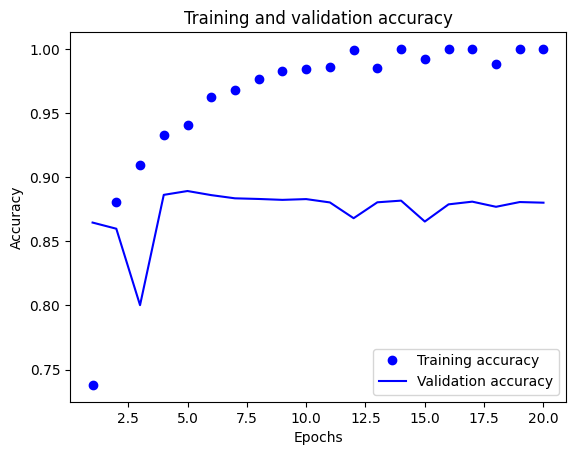

In [53]:
plt.clf()
accuracy = history_dict128["accuracy"]
validation_accuracy = history_dict128["val_accuracy"]
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, validation_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [54]:
history_128 = model_128.fit(train_review_vectors, train_sentiment_vectors, epochs=2, batch_size=512)
Outcomes_128 = model_128.evaluate(test_review_vectors, testing_sentiment_vectors)
Outcomes_128

Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.9322 - loss: 0.2439
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.9754 - loss: 0.0808
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8739 - loss: 0.3412


[0.34229081869125366, 0.8759999871253967]

In [55]:
model_128.predict(test_review_vectors)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


array([[0.00833882],
       [0.9999925 ],
       [0.8125218 ],
       ...,
       [0.02333056],
       [0.00775521],
       [0.8305276 ]], dtype=float32)

The validation set has an accuracy of 87.10%

##**MSE Loss Function**

In [56]:
np.random.seed(123)
model_MSE = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#Model compilation
model_MSE.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
# validation
x_validation = train_review_vectors[:10000]
train_reviews_subset = train_review_vectors[10000:]

y_validation = train_sentiment_vectors[:10000]
partial_y_train = train_sentiment_vectors[10000:]
# Model Fit
np.random.seed(123)
history_model_MSE = model_MSE.fit(train_reviews_subset,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_validation, y_validation))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.6972 - loss: 0.2152 - val_accuracy: 0.8534 - val_loss: 0.1416
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8756 - loss: 0.1237 - val_accuracy: 0.8743 - val_loss: 0.1079
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9007 - loss: 0.0901 - val_accuracy: 0.8828 - val_loss: 0.0942
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9210 - loss: 0.0710 - val_accuracy: 0.8862 - val_loss: 0.0884
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9344 - loss: 0.0612 - val_accuracy: 0.8779 - val_loss: 0.0898
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9409 - loss: 0.0541 - val_accuracy: 0.8870 - val_loss: 0.0837
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9462 - loss: 0.0488 - val_accuracy: 0.8843 - val_loss: 0.0835
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9591 - loss: 0.0411 - val_accuracy: 0.8847 - v

In [57]:
history_dict_MSE = history_model_MSE.history
history_dict_MSE.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

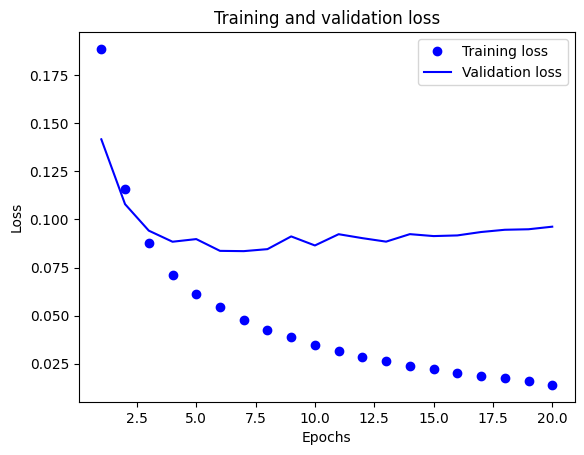

In [58]:
import matplotlib.pyplot as plt
loss_values = history_dict_MSE["loss"]
validation_loss = history_dict_MSE["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, validation_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

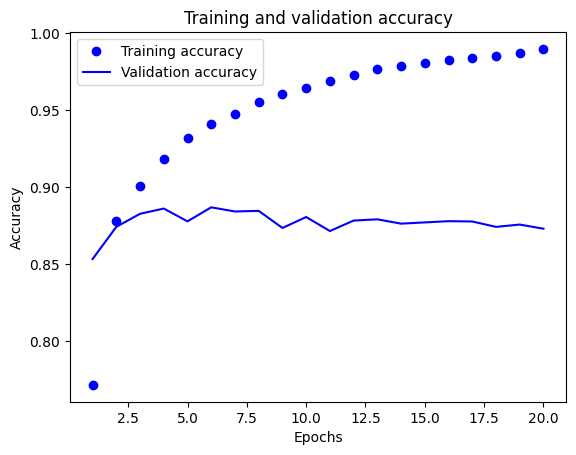

In [59]:
plt.clf()
accuracy = history_dict_MSE["accuracy"]
validation_accuracy = history_dict_MSE["val_accuracy"]
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, validation_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [60]:
model_MSE.fit(train_review_vectors, train_sentiment_vectors, epochs=8, batch_size=512)
Outcomes_MSE = model_MSE.evaluate(test_review_vectors, testing_sentiment_vectors)
Outcomes_MSE

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9450 - loss: 0.0454
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9551 - loss: 0.0390
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9643 - loss: 0.0332
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9678 - loss: 0.0312
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9710 - loss: 0.0286
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9739 - loss: 0.0254
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9761 - loss: 0.0241
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9781 - loss: 0.0228
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8582 - loss: 0.1159


[0.11436300724744797, 0.8596000075340271]

In [61]:
model_MSE.predict(test_review_vectors)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.00601923],
       [0.999883  ],
       [0.0924281 ],
       ...,
       [0.04977702],
       [0.00288228],
       [0.6335515 ]], dtype=float32)

##**Tanh Activation Function**

In [62]:
np.random.seed(123)
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model_tanh.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = train_review_vectors[:10000]
train_reviews_subset = train_review_vectors[10000:]

y_validation = train_sentiment_vectors[:10000]
partial_y_train = train_sentiment_vectors[10000:]

np.random.seed(123)

history_tanh = model_tanh.fit(train_reviews_subset,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_validation))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.6928 - loss: 0.5996 - val_accuracy: 0.8685 - val_loss: 0.3854
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8947 - loss: 0.3267 - val_accuracy: 0.8831 - val_loss: 0.3025
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9266 - loss: 0.2224 - val_accuracy: 0.8881 - val_loss: 0.2777
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9417 - loss: 0.1738 - val_accuracy: 0.8832 - val_loss: 0.2910
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9508 - loss: 0.1414 - val_accuracy: 0.8791 - val_loss: 0.3040
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9667 - loss: 0.1100 - val_accuracy: 0.8825 - val_loss: 0.3180
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9751 - loss: 0.0858 - val_accuracy: 0.8712 - val_loss: 0.3747
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9773 - loss: 0.0746 - val_accuracy: 0.8751 - v

In [63]:
history_dict_tanh = history_tanh.history
history_dict_tanh.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

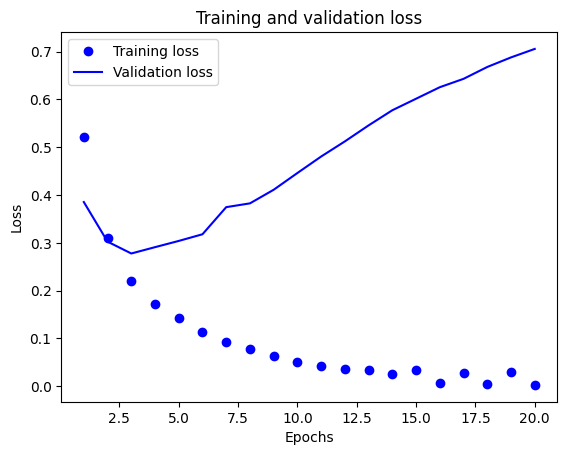

In [64]:
loss_values = history_dict_tanh["loss"]
validation_loss = history_dict_tanh["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, validation_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

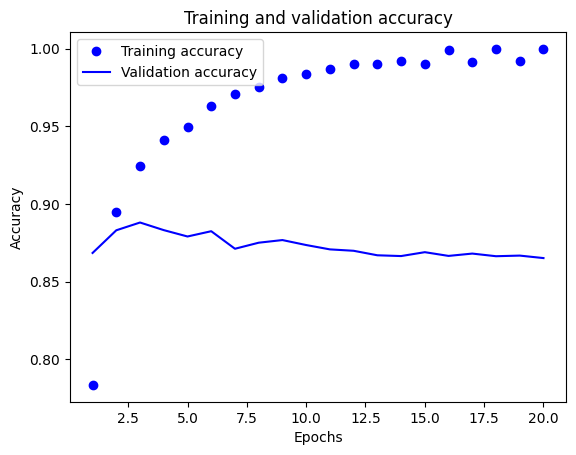

In [65]:
plt.clf()
accuracy = history_dict_tanh["accuracy"]
validation_accuracy = history_dict_tanh["val_accuracy"]
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, validation_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [66]:
model_tanh.fit(train_review_vectors,
train_sentiment_vectors
, epochs=8, batch_size=512)
Outcomes_tanh = model_tanh.evaluate(test_review_vectors, testing_sentiment_vectors)
Outcomes_tanh

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9414 - loss: 0.2789
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9625 - loss: 0.1435
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9667 - loss: 0.1142
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9715 - loss: 0.0956
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9786 - loss: 0.0765
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9799 - loss: 0.0702
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9821 - loss: 0.0581
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9851 - loss: 0.0505
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8535 - loss: 0.5904


[0.586819052696228, 0.8537999987602234]

##**Adam Optimizer Function**

In [67]:
np.random.seed(123)
model_adam = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_adam.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_validation = train_review_vectors[:10000]
train_reviews_subset = train_review_vectors[10000:]

y_validation = train_sentiment_vectors[:10000]
partial_y_train = train_sentiment_vectors[10000:]

np.random.seed(123)

history_adam = model_adam.fit(train_reviews_subset,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_validation, y_validation))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.6696 - loss: 0.6285 - val_accuracy: 0.8574 - val_loss: 0.4079
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8969 - loss: 0.3281 - val_accuracy: 0.8858 - val_loss: 0.2958
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9334 - loss: 0.2102 - val_accuracy: 0.8899 - val_loss: 0.2787
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9588 - loss: 0.1418 - val_accuracy: 0.8874 - val_loss: 0.2862
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9694 - loss: 0.1089 - val_accuracy: 0.8800 - val_loss: 0.3239
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9769 - loss: 0.0872 - val_accuracy: 0.8822 - val_loss: 0.3346
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9861 - loss: 0.0647 - val_accuracy: 0.8781 - val_loss: 0.3505
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9924 - loss: 0.0466 - val_accuracy: 0.8778 - v

In [68]:
history_dict_adam = history_adam.history
history_dict_adam.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

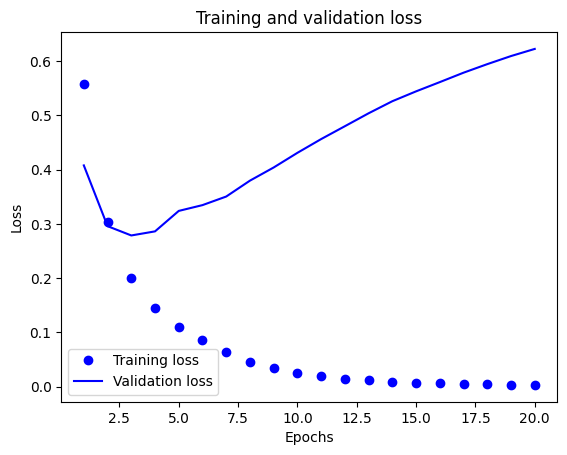

In [69]:
loss_values = history_dict_adam["loss"]
validation_loss = history_dict_adam["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, validation_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

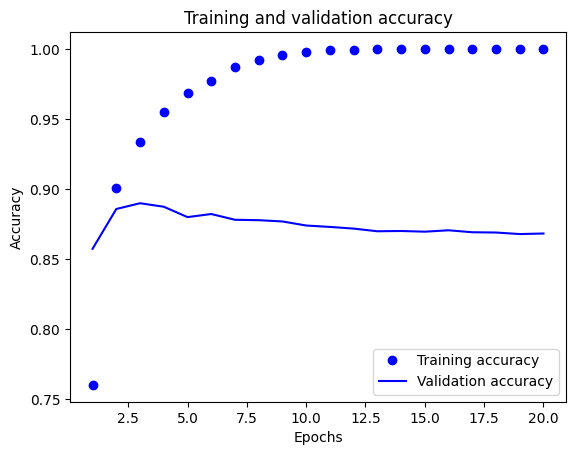

In [70]:
plt.clf()
accuracy = history_dict_adam["accuracy"]
validation_accuracy = history_dict_adam["val_accuracy"]
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, validation_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [71]:
model_adam.fit(train_review_vectors, train_sentiment_vectors, epochs=4, batch_size=512)
Outcomes_adam = model_adam.evaluate(test_review_vectors, testing_sentiment_vectors)
Outcomes_adam

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9433 - loss: 0.2331
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9668 - loss: 0.1051
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9829 - loss: 0.0661
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9914 - loss: 0.0464
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8568 - loss: 0.4850


[0.4820224344730377, 0.8584799766540527]

##**Regularization**

In [72]:
from tensorflow.keras import regularizers
np.random.seed(123)
model_regularization = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
model_regularization.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
np.random.seed(123)
history_model_regularization = model_regularization.fit(train_reviews_subset,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_validation, y_validation))
history_dict_regularization = history_model_regularization.history
history_dict_regularization.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.6880 - loss: 0.6557 - val_accuracy: 0.8623 - val_loss: 0.4607
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8909 - loss: 0.4069 - val_accuracy: 0.8828 - val_loss: 0.3722
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9149 - loss: 0.3151 - val_accuracy: 0.8705 - val_loss: 0.3609
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9278 - loss: 0.2706 - val_accuracy: 0.8897 - val_loss: 0.3285
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9395 - loss: 0.2393 - val_accuracy: 0.8877 - val_loss: 0.3296
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9483 - loss: 0.2157 - val_accuracy: 0.8863 - val_loss: 0.3325
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9560 - loss: 0.2040 - val_accuracy: 0.8821 - val_loss: 0.3516
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9581 - loss: 0.1928 - val_accuracy: 0.8847 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

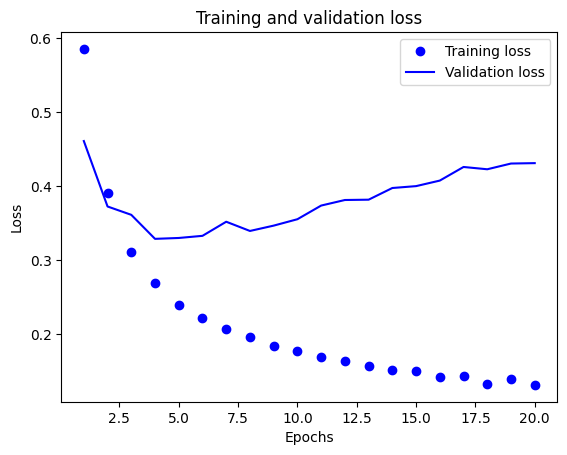

In [73]:
loss_values = history_dict_regularization["loss"]
validation_loss = history_dict_regularization["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, validation_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

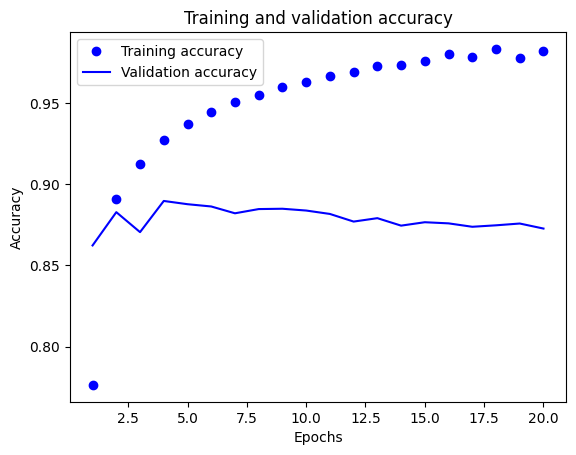

In [74]:
plt.clf()
accuracy = history_dict_regularization["accuracy"]
validation_accuracy = history_dict_regularization["val_accuracy"]
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, validation_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [75]:
model_regularization.fit(train_review_vectors,
train_sentiment_vectors
, epochs=8, batch_size=512)
Outcomes_regularization = model_regularization.evaluate(test_review_vectors, testing_sentiment_vectors)
Outcomes_regularization

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9387 - loss: 0.2487
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9500 - loss: 0.2068
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9559 - loss: 0.1875
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9623 - loss: 0.1736
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9689 - loss: 0.1597
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9694 - loss: 0.1580
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9727 - loss: 0.1527
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9740 - loss: 0.1498
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8660 - loss: 0.4379


[0.43643325567245483, 0.8668799996376038]

The loss on test set is 0.4194 and accuracy is 87.00%

## **Dropout**

In [76]:
from tensorflow.keras import regularizers
np.random.seed(123)
model_Dropout = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Dropout.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
np.random.seed(123)
history_model_Dropout = model_Dropout.fit(train_reviews_subset,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_validation, y_validation))
history_dict_Dropout = history_model_Dropout.history
history_dict_Dropout.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.5649 - loss: 0.6725 - val_accuracy: 0.8299 - val_loss: 0.5610
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7049 - loss: 0.5734 - val_accuracy: 0.8608 - val_loss: 0.4615
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7785 - loss: 0.4879 - val_accuracy: 0.8785 - val_loss: 0.3727
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8277 - loss: 0.4104 - val_accuracy: 0.8824 - val_loss: 0.3172
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8645 - loss: 0.3486 - val_accuracy: 0.8866 - val_loss: 0.2954
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8863 - loss: 0.3151 - val_accuracy: 0.8875 - val_loss: 0.2777
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8998 - loss: 0.2812 - val_accuracy: 0.8897 - val_loss: 0.2737
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9138 - loss: 0.2494 - val_accuracy: 0.8889 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

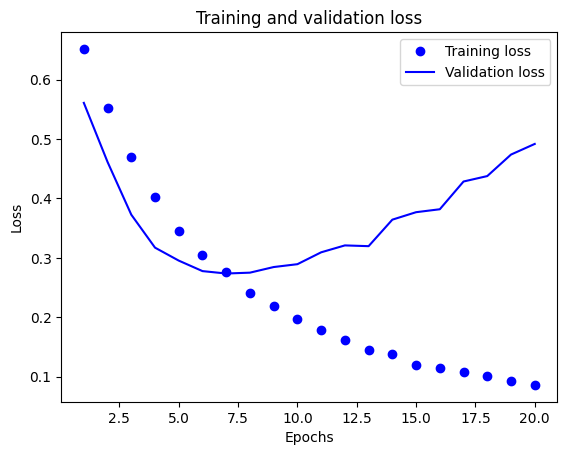

In [77]:
loss_values = history_dict_Dropout["loss"]
validation_loss = history_dict_Dropout["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, validation_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

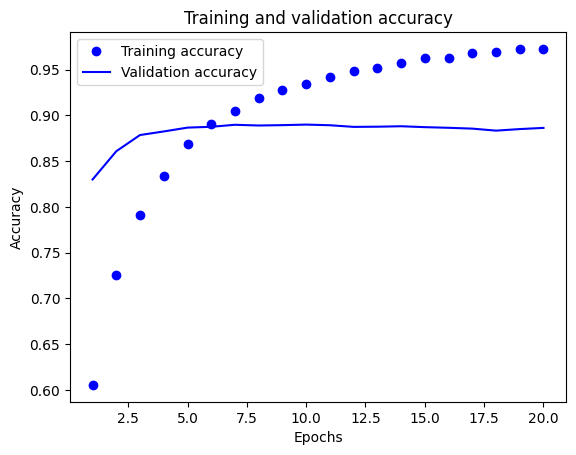

In [78]:
plt.clf()
accuracy = history_dict_Dropout["accuracy"]
validation_accuracy = history_dict_Dropout["val_accuracy"]
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, validation_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [79]:
model_Dropout.fit(train_review_vectors, train_sentiment_vectors, epochs=8, batch_size=512)
Outcomes_Dropout = model_Dropout.evaluate(test_review_vectors, testing_sentiment_vectors)
Outcomes_Dropout

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9314 - loss: 0.2458
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9384 - loss: 0.2061
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9444 - loss: 0.1859
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9484 - loss: 0.1639
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9511 - loss: 0.1611
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9549 - loss: 0.1483
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9590 - loss: 0.1326
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9596 - loss: 0.1337
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8728 - loss: 0.4840


[0.4790287911891937, 0.8749200105667114]

loss on the test set is 0.455 and accuracy is 0.8736

#**Training moel with hyper tuned parameters**

In [80]:
from tensorflow.keras import regularizers
np.random.seed(123)
model_Hyper = keras.Sequential([
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Hyper.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
np.random.seed(123)
history_model_Hyper = model_Hyper.fit(train_reviews_subset,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_validation, y_validation))
history_dict_Hyper = history_model_Hyper.history
history_dict_Hyper.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.5242 - loss: 0.2602 - val_accuracy: 0.7506 - val_loss: 0.2381
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7171 - loss: 0.2288 - val_accuracy: 0.8206 - val_loss: 0.1958
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.8079 - loss: 0.1984 - val_accuracy: 0.8552 - val_loss: 0.1674
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8632 - loss: 0.1695 - val_accuracy: 0.8734 - val_loss: 0.1504
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8961 - loss: 0.1474 - val_accuracy: 0.8775 - val_loss: 0.1370
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9052 - loss: 0.1320 - val_accuracy: 0.8822 - val_loss: 0.1238
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9195 - loss: 0.1099 - val_accuracy: 0.8805 - val_loss: 0.1151
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9273 - loss: 0.0978 - val_accuracy: 0.8822 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

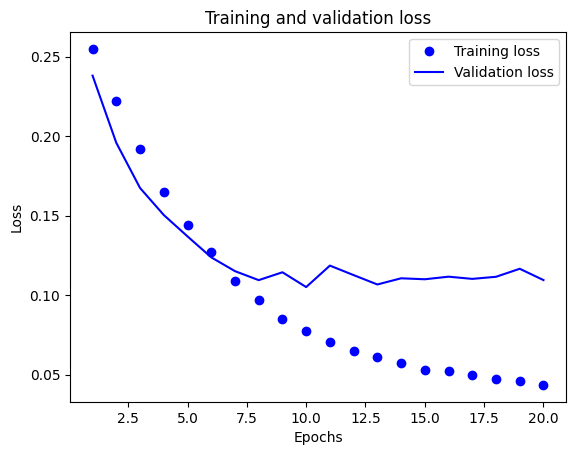

In [81]:
loss_values = history_dict_Hyper["loss"]
validation_loss = history_dict_Hyper["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, validation_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

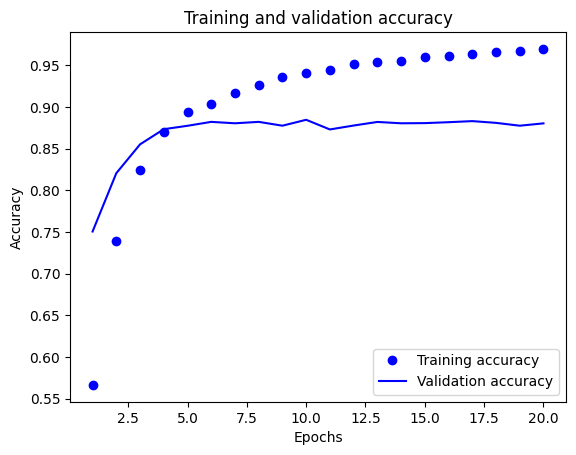

In [82]:
plt.clf()
accuracy = history_dict_Hyper["accuracy"]
validation_accuracy = history_dict_Hyper["val_accuracy"]
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, validation_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [83]:
model_Hyper.fit(train_review_vectors, train_sentiment_vectors, epochs=8, batch_size=512)
Outcomes_Hyper = model_Hyper.evaluate(test_review_vectors, testing_sentiment_vectors)
Outcomes_Hyper

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9265 - loss: 0.0776
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9353 - loss: 0.0699
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9408 - loss: 0.0656
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9472 - loss: 0.0612
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9481 - loss: 0.0594
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9517 - loss: 0.0558
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9550 - loss: 0.0533
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9545 - loss: 0.0532
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8756 - loss: 0.1154


[0.11290387064218521, 0.8783599734306335]

#**Summary**

In [84]:
All_Models_Loss= np.array([Outcomes_Dropout[0],Outcomes_Hyper[0],Outcomes_MSE[0],Outcomes_regularization[0],Outcomes_tanh[0]])*100
All_Models_Loss
All_Models_Accuracy= np.array([Outcomes_Dropout[1],Outcomes_Hyper[1],Outcomes_MSE[1],Outcomes_regularization[1],Outcomes_tanh[1]])*100
All_Models_Accuracy
Labels=['Model_Dropout','Model_Hyper','Model_MSE','model_regularization','model_tanh']
plt.clf()

<Figure size 640x480 with 0 Axes>

##**Compilation**

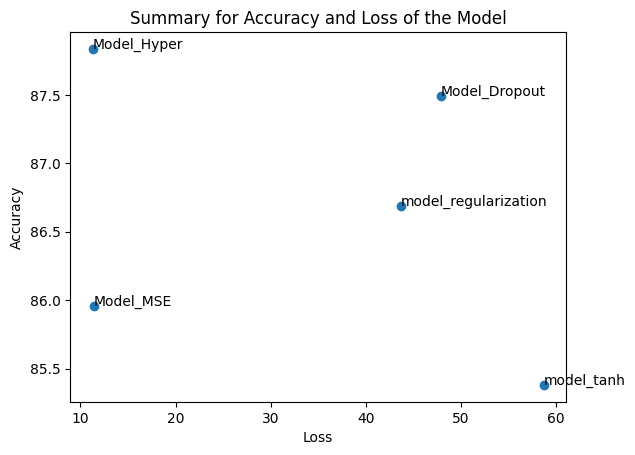

In [85]:
fig, ax = plt.subplots()
ax.scatter(All_Models_Loss,All_Models_Accuracy)
for i, txt in enumerate(Labels):
    ax.annotate(txt, (All_Models_Loss[i],All_Models_Accuracy[i] ))
plt.title("Summary for Accuracy and Loss of the Model")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

### **Model Performance Summary and Comparison**

This research investigated various neural network architectures and optimization techniques aimed at enhancing the accuracy of sentiment analysis while mitigating overfitting. Significant experiments included hyperparameter tuning, dropout regularization, the implementation of the MSE loss function, and the evaluation of different activation functions.

**Model_Hyper** achieved superior results with an accuracy nearing 88% and minimal loss, highlighting the effectiveness of precise hyperparameter tuning.
**Model_MSE** showed competitive performance at 86.5% accuracy, confirming the suitability of MSE for classification tasks.
**Model_Dropout** recorded approximately 87% accuracy, illustrating the beneficial impact of dropout on generalization.

Although regularization techniques such as dropout and L2 weight decay enhanced generalization, they did lead to a slight decrease in accuracy. The choice of activation functions was crucial; ReLU consistently outperformed tanh, as evidenced by **Model_Tanh**, which exhibited the lowest accuracy (~85%).

### **Key Insights**

- Hyperparameter tuning strikes an optimal balance between accuracy and loss.
- Regularization methods can reduce overfitting but may have a minor adverse effect on performance.
- ReLU activation facilitates quicker and more effective learning compared to tanh.
- Excessive use of regularization might inadvertently result in overfitting.

### **Conclusion**

The model that performed best integrated hyperparameter tuning with MSE loss, achieving both robust generalization and high accuracy. While deeper networks provided a slight enhancement in accuracy, they also heightened the risk of overfitting. Simpler models featuring one or two hidden layers delivered comparable outcomes with greater stability. Future enhancements could involve experimenting with new activation functions, adaptive regularization strategies, and optimized dropout rates to further enhance model reliability.